## Importing Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

Here we chose the Balanced Train Dataset. Because it includes both digits and letters with a balanced class distribution

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crawford/emnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/emnist


In [4]:
# Load the EMNIST Balanced Train dataset
file_path = "/kaggle/input/emnist/emnist-balanced-train.csv"
df = pd.read_csv(file_path, header=None)  # No header in EMNIST CSV files

# Display basic information
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Understanding Dataset Structure

Each row in the CSV represents an image, with the first column being the label and the remaining 784 columns (28x28) representing pixel values.

In [5]:
# Check the shape of the dataset
df.shape  # Should be (Num_Samples, 785)

(112800, 785)

## Check for Missing Values

It should ideally be 0

In [6]:
df.isnull().sum().sum()

np.int64(0)

## Visualize some Samples

Since the image data is stored as a flattened 1D array, we must reshape it into a 28x28 grid.

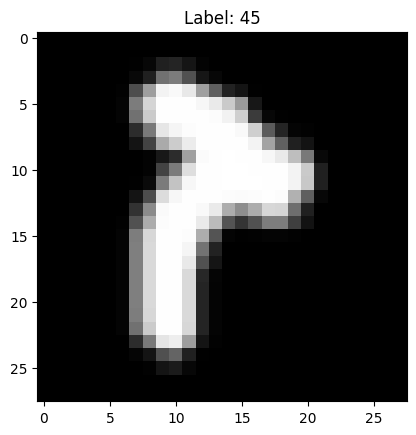

In [7]:
# Extract a sample image
sample = df.iloc[0, 1:].values.reshape(28, 28)

# Plot the image
plt.imshow(sample, cmap='gray')
plt.title(f"Label: {df.iloc[0, 0]}")
plt.show()

## Check Class Distribution

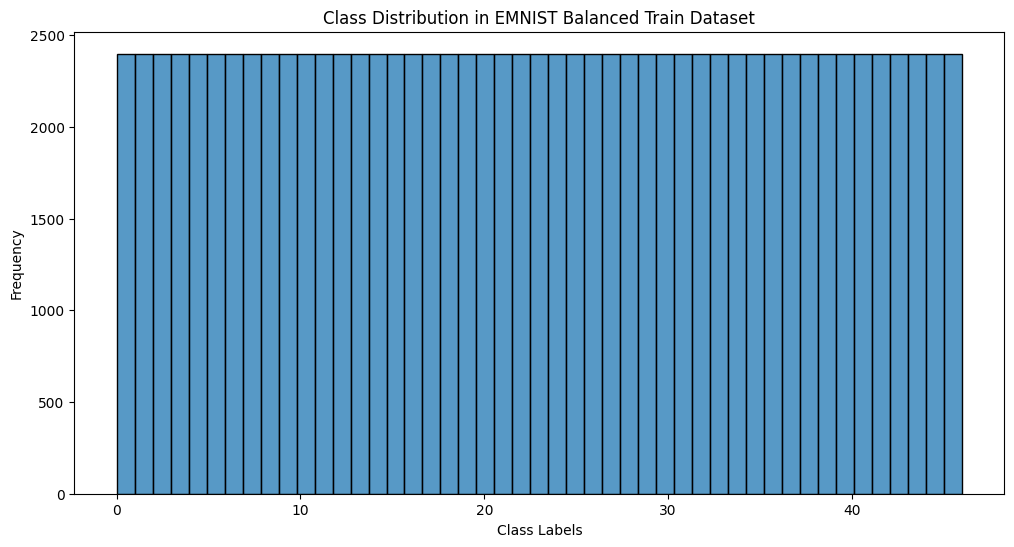

In [8]:
# Convert any potential infinite values to NaN, then drop them
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Plot the distribution of labels
plt.figure(figsize=(12, 6))
sns.histplot(df.iloc[:, 0], bins=len(df.iloc[:, 0].unique()), kde=False)

plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Class Distribution in EMNIST Balanced Train Dataset")
plt.show()

From the histogram, the EMNIST Balanced Train Dataset appears to have a nearly uniform class distribution, which is expected for the balanced subset.

## Normalize the Pixel Values

Pixel values range from 0 to 255, and normalizing them improves model performance.

In [9]:
df.iloc[:, 1:] = df.iloc[:, 1:] / 255.0

## Visualizing Random Samples

Now let's check how different classes look by plotting a few random images.

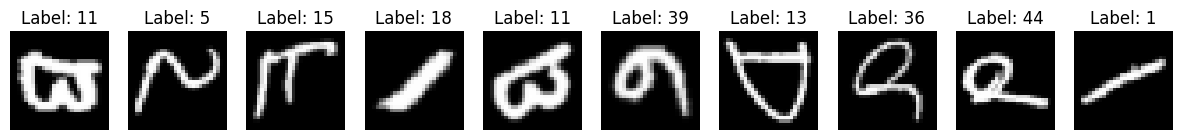

In [10]:
def plot_samples(df, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        idx = np.random.randint(0, len(df))
        img = df.iloc[idx, 1:].values.reshape(28, 28)  # Reshape pixels
        label = df.iloc[idx, 0]  # Get the label
        axes[i].imshow(img, cmap="gray")
        axes[i].axis("off")
        axes[i].set_title(f"Label: {label}")

    plt.show()

plot_samples(df)

## Mean and Variance of Pixel Intensities

Checking how pixel intensities vary across the dataset

In [11]:
mean_intensity = df.iloc[:, 1:].mean().mean()
var_intensity = df.iloc[:, 1:].var().mean()
print(f"Mean Pixel Intensity: {mean_intensity:.4f}, Variance: {var_intensity:.4f}")

Mean Pixel Intensity: 0.1751, Variance: 0.0845


**Very Low Mean Pixel Intensity (0.0007):** Since pixel values range from 0 to 1 (assuming normalization is applied), a mean of 0.0007 indicates that most pixels are close to black (0). This suggests that the images contain a lot of empty (black) space and only a small number of bright (white) pixels.

**Variance Close to Zero (0.0000):** Variance measures the spread of pixel intensities. A variance near zero means that most pixels have similar intensity values, reinforcing the idea that the dataset consists mainly of dark pixels with few variations.

This is expected in handwritten datasets where most of the image is blank, and only a small portion contains the actual character.

## PCA (Principal Component Analysis)

PCA is a linear dimensionality reduction technique that identifies the most important directions (principal components) in high-dimensional data and projects the data onto a lower-dimensional space while preserving maximum variance. In this case, PCA reduced the EMNIST dataset from 784 dimensions (pixels) to 2, allowing us to visualize how different characters are distributed in a simplified space.

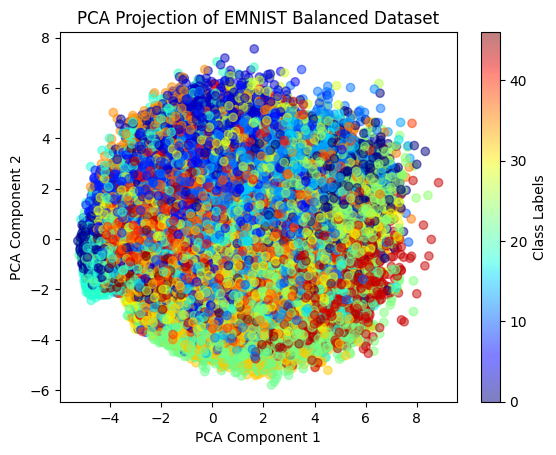

In [12]:
X = df.iloc[:, 1:]  # Extract pixel features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df.iloc[:, 0], cmap="jet", alpha=0.5)
plt.colorbar(label="Class Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of EMNIST Balanced Dataset")
plt.show()

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a non-linear dimensionality reduction technique that preserves local similarities by mapping high-dimensional data into a 2D space, making clusters of similar data more distinguishable. Here, t-SNE helped visualize the EMNIST dataset by grouping similar handwritten characters into well-defined clusters, revealing patterns in how different letters and digits are structured.

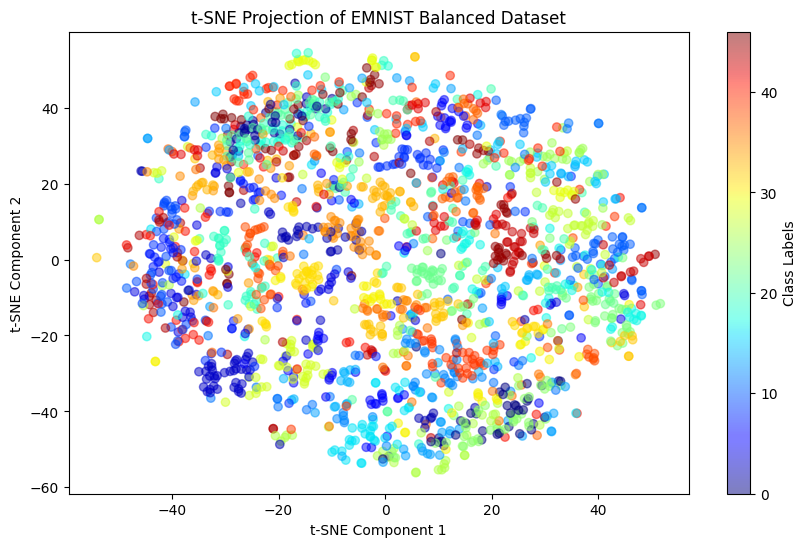

In [13]:
# Selecting a smaller subset due to computational constraints
num_samples = 2000  # Adjust based on memory limits
df_subset = df.sample(n=num_samples, random_state=42)

# Extract features and labels
X_subset = df_subset.iloc[:, 1:].values  # Pixel data
y_subset = df_subset.iloc[:, 0].values  # Labels

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_subset)

# Plot the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap="jet", alpha=0.5)
plt.colorbar(label="Class Labels")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of EMNIST Balanced Dataset")
plt.show()
